In [20]:
# Create a new notebook: notebooks/02_pandas_mastery.ipynb

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

print("Pandas: Transforming Messy Data into AI Gold")
print("=" * 45)

# Load our sample datasets
customers_df = pd.read_csv("../data/raw/customers.csv")
sales_df = pd.read_csv("../data/raw/sales.csv")

print("Dataset Overview:")
print(f"Customers: {customers_df.shape[0]} rows, {customers_df.shape[1]} columns")
print(f"Sales: {sales_df.shape[0]} rows, {sales_df.shape[1]} columns")

Pandas: Transforming Messy Data into AI Gold
Dataset Overview:
Customers: 10000 rows, 8 columns
Sales: 50000 rows, 7 columns


In [21]:
# 1. Data Exploration - Understanding Your Dataset
print("\n1. Data Exploration Techniques:")

# Quick overview
print("Customer Data Info:")
print(customers_df.info())
print("\nFirst 5 customers:")
print(customers_df.head())

# Statistical summary
print("\nStatistical Summary:")
print(customers_df.describe())

# Data types and missing values (critical for AI preprocessing)
print("\nMissing Values:")
missing_data = customers_df.isnull().sum()
print(missing_data[missing_data > 0])

# Unique values in categorical columns
print("\nUnique Values in Categorical Columns:")
for column in ['gender', 'city']:
    print(f"{column}: {customers_df[column].unique()}")
    print(f"Value counts:\n{customers_df[column].value_counts()}\n")


1. Data Exploration Techniques:
Customer Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_id           10000 non-null  int64  
 1   age                   10000 non-null  int64  
 2   annual_income         9500 non-null   float64
 3   spending_score        10000 non-null  float64
 4   gender                10000 non-null  object 
 5   city                  10000 non-null  object 
 6   membership_years      10000 non-null  float64
 7   last_purchase_amount  10000 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 625.1+ KB
None

First 5 customers:
   customer_id  age  annual_income  spending_score  gender         city  \
0            1   40   39822.579043       58.707156  Female      Houston   
1            2   33   45417.508054       57.083090  Female      Houston   
2            3  

In [22]:
# 2. Data Cleaning - Preparing for AI Models
print("\n2. Data Cleaning Operations:")

# Handle missing values (essential for AI model training)
print("Before cleaning:")
print(f"Missing income values: {customers_df['annual_income'].isnull().sum()}")

# Strategy 1: Fill with median (robust to outliers)
customers_clean = customers_df.copy()
median_income = customers_clean['annual_income'].median()
customers_clean['annual_income'].fillna(median_income, inplace=True)

print("After cleaning:")
print(f"Missing income values: {customers_clean['annual_income'].isnull().sum()}")

# Data type conversions (ensuring proper types for AI)
customers_clean['age'] = customers_clean['age'].astype(int)
customers_clean['membership_years'] = customers_clean['membership_years'].round(1)

# Handle negative ages (data quality issue)
invalid_ages = customers_clean['age'] < 0
print(f"Invalid ages found: {invalid_ages.sum()}")
customers_clean.loc[invalid_ages, 'age'] = customers_clean['age'].median()

# Outlier detection and handling
print("\nOutlier Analysis:")
Q1 = customers_clean['annual_income'].quantile(0.25)
Q3 = customers_clean['annual_income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (customers_clean['annual_income'] < lower_bound) | (customers_clean['annual_income'] > upper_bound)
print(f"Outliers detected: {outliers.sum()} ({outliers.sum()/len(customers_clean)*100:.1f}%)")

# Cap outliers instead of removing them (preserves data for AI training)
customers_clean.loc[customers_clean['annual_income'] < lower_bound, 'annual_income'] = lower_bound
customers_clean.loc[customers_clean['annual_income'] > upper_bound, 'annual_income'] = upper_bound


2. Data Cleaning Operations:
Before cleaning:
Missing income values: 500
After cleaning:
Missing income values: 0
Invalid ages found: 13

Outlier Analysis:
Outliers detected: 109 (1.1%)


/var/folders/7r/97vw1q7x18x8btt349jvjpvc0000gn/T/ipykernel_34371/3003443574.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customers_clean['annual_income'].fillna(median_income, inplace=True)



3. Feature Engineering for AI Models:


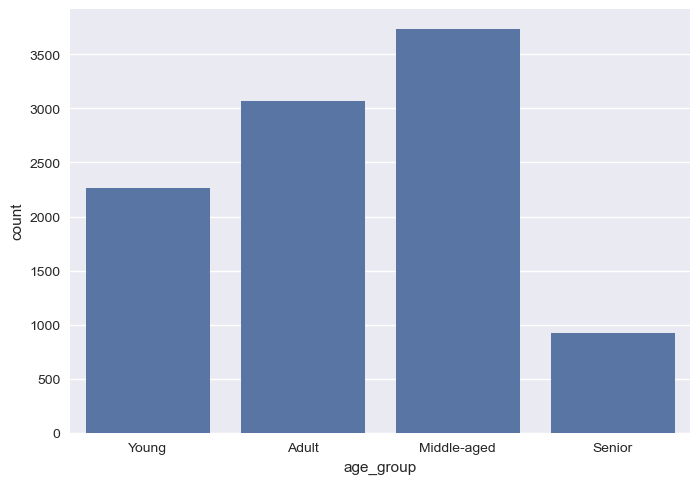

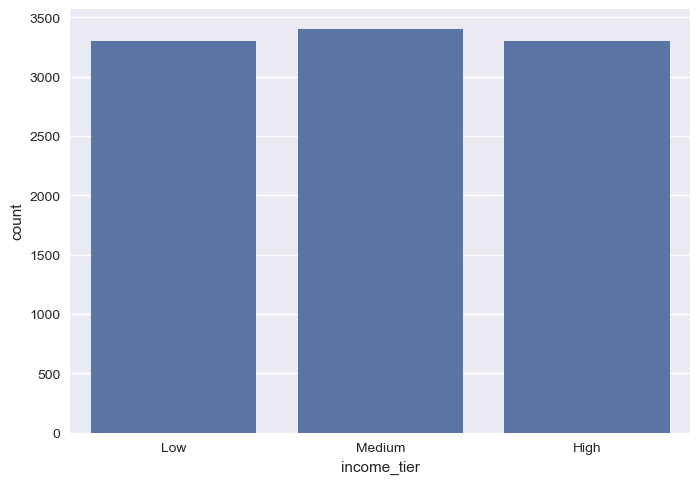

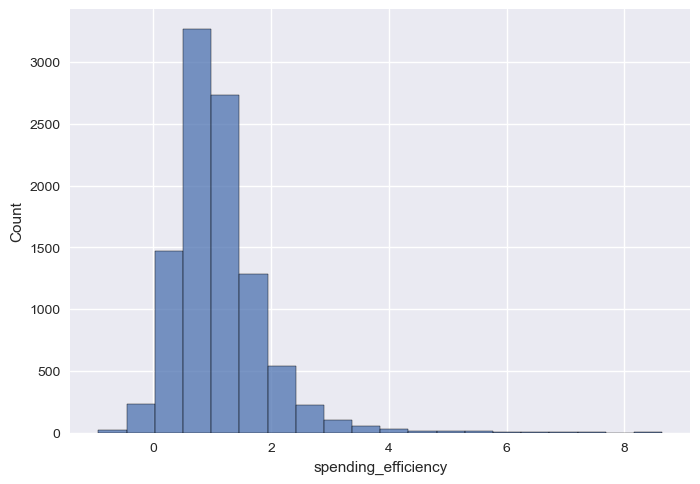

New Features Created:
     age_group income_tier  spending_efficiency  estimated_clv
0  Middle-aged         Low             1.474218   56108.888828
1        Adult      Medium             1.256852   12962.858457
2  Middle-aged      Medium             0.529089   25384.225771
3       Senior      Medium             1.248437    3331.292522
4        Adult        High             0.187586   28588.557794


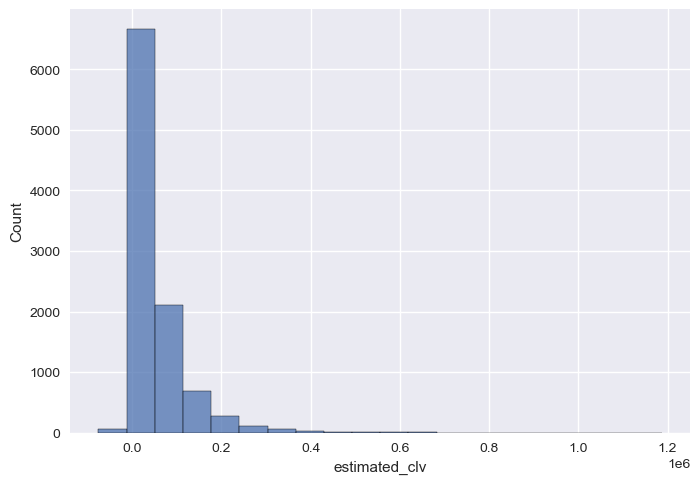

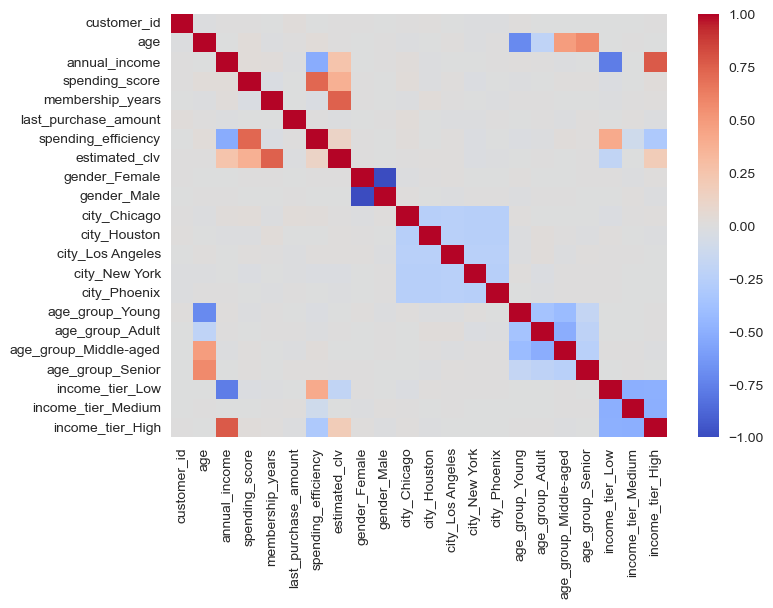


Original columns: 12
After encoding: 22
New categorical columns: ['gender_Female', 'gender_Male', 'city_Chicago', 'city_Houston', 'city_Los Angeles', 'city_New York', 'city_Phoenix', 'age_group_Young', 'age_group_Adult', 'age_group_Middle-aged', 'age_group_Senior', 'income_tier_Low', 'income_tier_Medium', 'income_tier_High']


In [23]:
# 3. Feature Engineering - Creating AI-Ready Features
print("\n3. Feature Engineering for AI Models:")

# Create new features from existing data
customers_featured = customers_clean.copy()

# Age categories (useful for machine learning models)
customers_featured['age_group'] = pd.cut(customers_featured['age'], 
                                       bins=[0, 25, 35, 50, 100], 
                                       labels=['Young', 'Adult', 'Middle-aged', 'Senior'])

# Seaborn graphical representation of age groups
sns.countplot(data=customers_featured, x='age_group')
plt.show()

# Income categories
income_percentiles = customers_featured['annual_income'].quantile([0.33, 0.67])
customers_featured['income_tier'] = pd.cut(customers_featured['annual_income'],
                                         bins=[0, income_percentiles.iloc[0], income_percentiles.iloc[1], float('inf')],
                                         labels=['Low', 'Medium', 'High'])

# Graphical representation of income tiers
sns.countplot(data=customers_featured, x='income_tier')
plt.show()

# Spending efficiency (ratio of spending to income)
customers_featured['spending_efficiency'] = customers_featured['spending_score'] / (customers_featured['annual_income'] / 1000)

# Graphical representation of spending efficiency
sns.histplot(data=customers_featured, x='spending_efficiency', bins=20)
plt.show()

# Customer lifetime value estimate
customers_featured['estimated_clv'] = (customers_featured['annual_income'] * 
                                     customers_featured['spending_score'] / 100 * 
                                     customers_featured['membership_years'])

print("New Features Created:")
print(customers_featured[['age_group', 'income_tier', 'spending_efficiency', 'estimated_clv']].head())

# Graphical representation of estimated CLV
sns.histplot(data=customers_featured, x='estimated_clv', bins=20)
plt.show()

# One-hot encoding for categorical variables (required for most AI models)
categorical_columns = ['gender', 'city', 'age_group', 'income_tier']
customers_encoded = pd.get_dummies(customers_featured, columns=categorical_columns, prefix=categorical_columns)

# Graphical representation of encoded data
sns.heatmap(customers_encoded.corr(),  cmap='coolwarm')
plt.show()

print(f"\nOriginal columns: {len(customers_featured.columns)}")
print(f"After encoding: {len(customers_encoded.columns)}")
print(f"New categorical columns: {[col for col in customers_encoded.columns if any(cat in col for cat in categorical_columns)]}")

In [24]:
# 4. Data Aggregation and Grouping - Business Intelligence for AI
print("\n4. Data Aggregation and Analysis:")

# Convert sales date to datetime for time-based analysis
sales_clean = sales_df.copy()
sales_clean['sale_date'] = pd.to_datetime(sales_clean['sale_date'])
sales_clean['year'] = sales_clean['sale_date'].dt.year
sales_clean['month'] = sales_clean['sale_date'].dt.month
sales_clean['weekday'] = sales_clean['sale_date'].dt.day_name()

print(sales_clean.head(5))

# Group by operations (essential for creating training features)
# Customer-level aggregations
customer_summary = sales_clean.groupby('customer_id').agg({
    'sale_amount': ['count', 'sum', 'mean', 'std'],
    'discount_applied': 'mean',
    'sale_date': ['min', 'max']
}).round(2)

# Flatten column names
customer_summary.columns = ['_'.join(col).strip() for col in customer_summary.columns]
customer_summary.reset_index(inplace=True)

print("Customer Purchase Summary (first 5):")
print(customer_summary.head())

# Time-based analysis (important for understanding trends)
monthly_sales = sales_clean.groupby(['year', 'month']).agg({
    'sale_amount': 'sum',
    'sale_id': 'count'
}).round(2)

monthly_sales.columns = ['total_revenue', 'total_transactions']
print("\nMonthly Sales Trends:")
print(monthly_sales.head(10))

# Category analysis
category_analysis = sales_clean.groupby('product_category').agg({
    'sale_amount': ['count', 'sum', 'mean'],
    'discount_applied': 'mean'
}).round(2)

category_analysis.columns = ['transaction_count', 'total_revenue', 'avg_transaction', 'avg_discount']
category_analysis = category_analysis.sort_values('total_revenue', ascending=False)

print("\nProduct Category Performance:")
print(category_analysis)


4. Data Aggregation and Analysis:
   sale_id  customer_id product_category  sale_amount  \
0        1         4063      Electronics    26.761137   
1        2         2468      Electronics    77.314968   
2        3         5494            Books    18.169333   
3        4           14            Books    29.096379   
4        5         1963      Electronics     7.662712   

                      sale_date  discount_applied payment_method  year  month  \
0 2023-01-01 00:00:00.000000000                 5    Credit Card  2023      1   
1 2023-01-01 00:14:53.393867877                 5         PayPal  2023      1   
2 2023-01-01 00:29:46.787735754                 0     Debit Card  2023      1   
3 2023-01-01 00:44:40.181603632                 0    Credit Card  2023      1   
4 2023-01-01 00:59:33.575471509                20     Debit Card  2023      1   

  weekday  
0  Sunday  
1  Sunday  
2  Sunday  
3  Sunday  
4  Sunday  
Customer Purchase Summary (first 5):
   customer_id  sale_amoun


 Simple Data Visualizations:


/var/folders/7r/97vw1q7x18x8btt349jvjpvc0000gn/T/ipykernel_34371/2743634119.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 0].boxplot(gender_groups, labels=['Male', 'Female'], patch_artist=True,


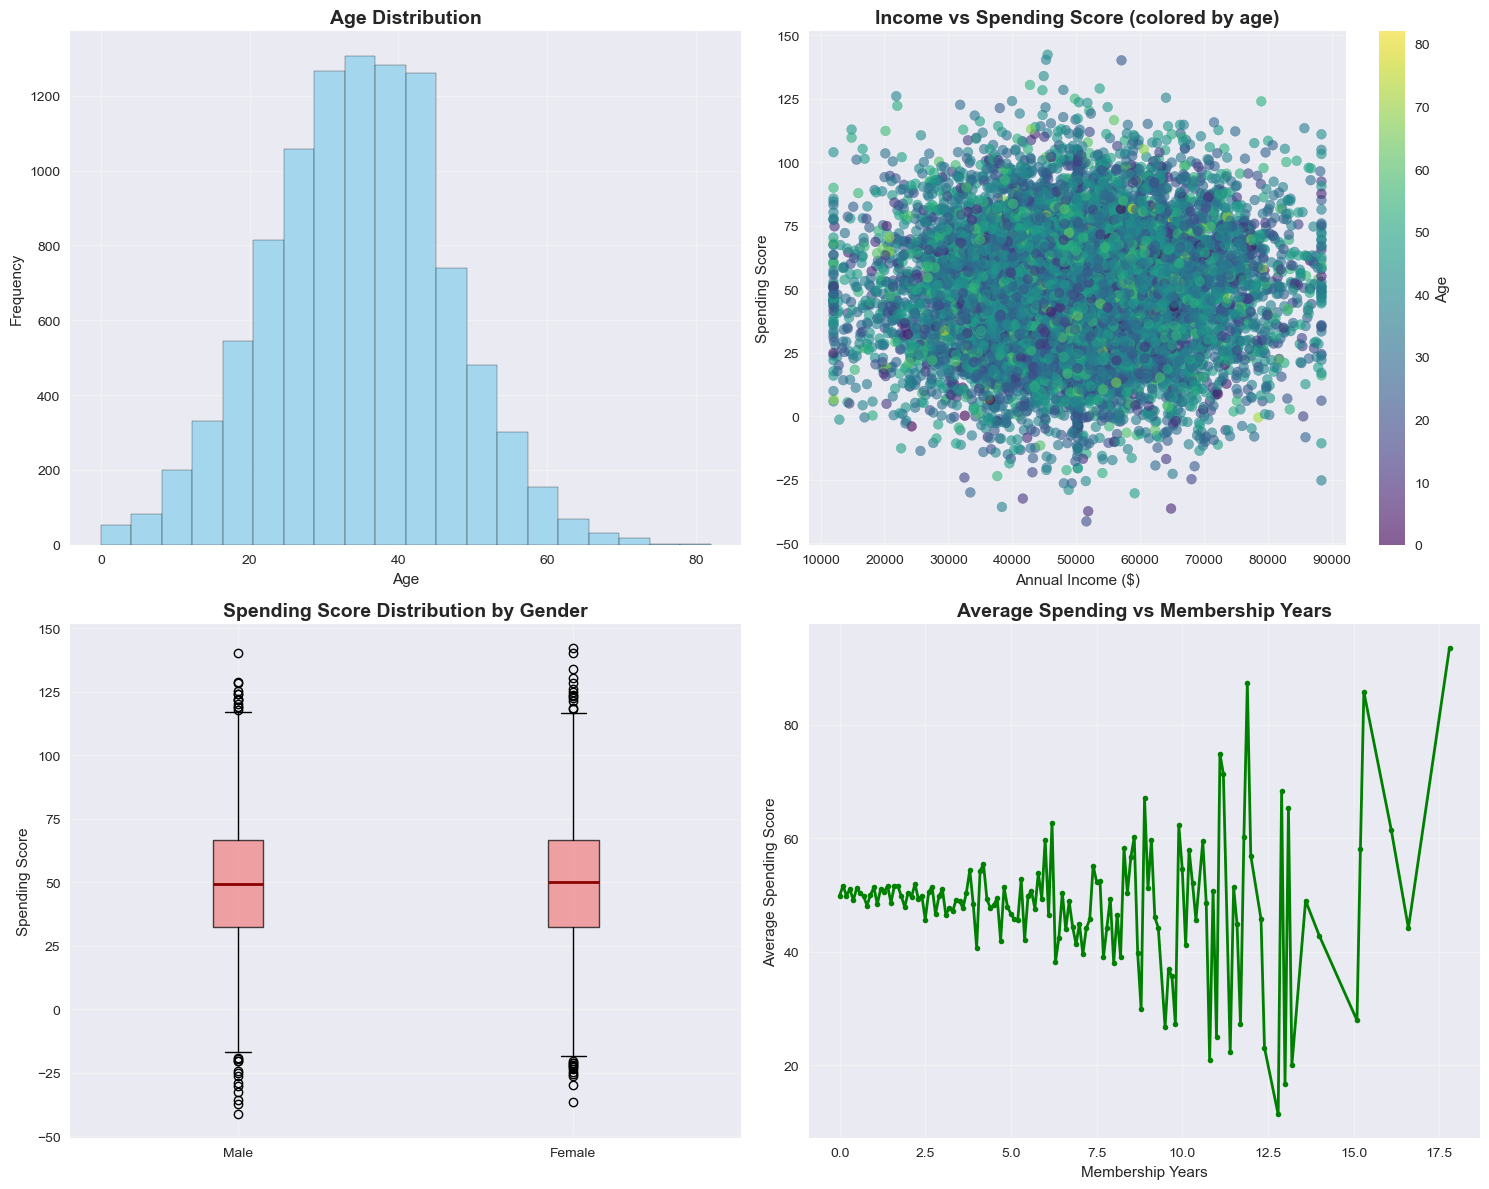

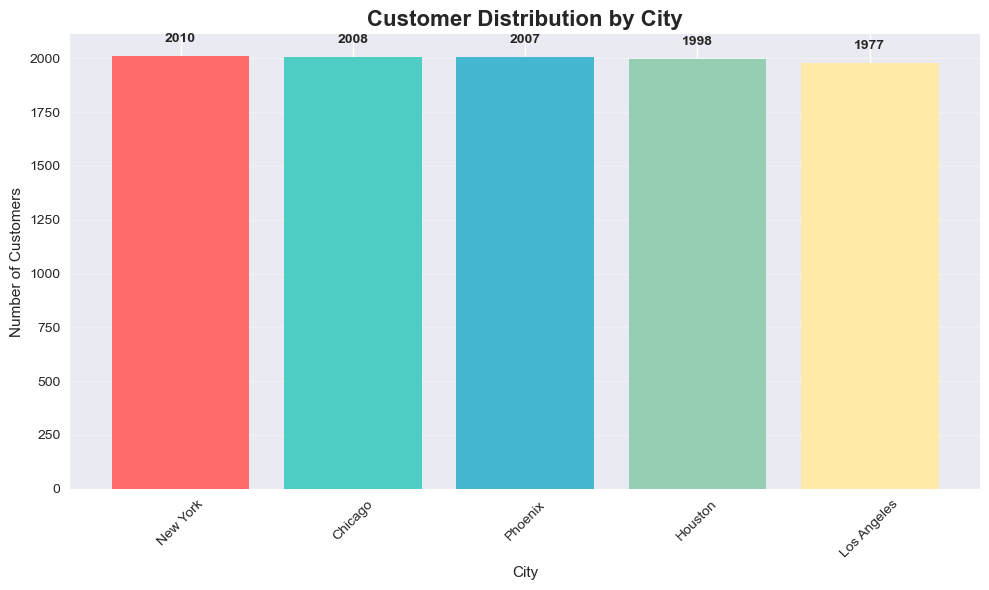

✅ Visualizations complete! These graphs help us understand:
  • Age distribution in our customer base
  • Relationship between income and spending behavior
  • Gender differences in spending patterns
  • How loyalty (membership years) affects spending
  • Geographic distribution of customers


In [25]:
# Simple Graphical Representations - Visualizing Your Data Story
print("\n Simple Data Visualizations:")

# Set up the plotting style
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Age distribution histogram
axes[0, 0].hist(customers_clean['age'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Age Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True, alpha=0.3)

# 2. Income vs Spending Score scatter plot
scatter = axes[0, 1].scatter(customers_clean['annual_income'], customers_clean['spending_score'], 
                           alpha=0.6, c=customers_clean['age'], cmap='viridis', s=50)
axes[0, 1].set_title('Income vs Spending Score (colored by age)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Annual Income ($)')
axes[0, 1].set_ylabel('Spending Score')
axes[0, 1].grid(True, alpha=0.3)
plt.colorbar(scatter, ax=axes[0, 1], label='Age')

# 3. Box plot of spending scores by gender
gender_groups = [customers_clean[customers_clean['gender'] == 'Male']['spending_score'],
                customers_clean[customers_clean['gender'] == 'Female']['spending_score']]
axes[1, 0].boxplot(gender_groups, labels=['Male', 'Female'], patch_artist=True,
                   boxprops=dict(facecolor='lightcoral', alpha=0.7),
                   medianprops=dict(color='darkred', linewidth=2))
axes[1, 0].set_title('Spending Score Distribution by Gender', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Spending Score')
axes[1, 0].grid(True, alpha=0.3)

# 4. Line plot of average spending by membership years
membership_spending = customers_clean.groupby('membership_years')['spending_score'].mean().sort_index()
axes[1, 1].plot(membership_spending.index, membership_spending.values, 
                marker='o', linewidth=2, markersize=4, color='green')
axes[1, 1].set_title('Average Spending vs Membership Years', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Membership Years')
axes[1, 1].set_ylabel('Average Spending Score')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Simple bar chart of city distribution
plt.figure(figsize=(10, 6))
city_counts = customers_clean['city'].value_counts()
bars = plt.bar(city_counts.index, city_counts.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7'])
plt.title('Customer Distribution by City', fontsize=16, fontweight='bold')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 50,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("✅ Visualizations complete! These graphs help us understand:")
print("  • Age distribution in our customer base")
print("  • Relationship between income and spending behavior")
print("  • Gender differences in spending patterns")
print("  • How loyalty (membership years) affects spending")
print("  • Geographic distribution of customers")


In [26]:
# 5. Data Merging and Joining - Combining Multiple Data Sources
print("\n5. Data Merging Operations:")

# Merge customer and sales data (common in AI projects)
# This creates a comprehensive dataset for machine learning

# First, get customer summary statistics
customer_metrics = sales_clean.groupby('customer_id').agg({
    'sale_amount': ['sum', 'mean', 'count', 'std'],
    'discount_applied': 'mean',
    'sale_date': 'max'
}).round(2)

customer_metrics.columns = ['total_spent', 'avg_transaction', 'transaction_count', 'spending_volatility', 'avg_discount', 'last_purchase']
customer_metrics.reset_index(inplace=True)

# Merge with customer data
complete_dataset = customers_clean.merge(customer_metrics, on='customer_id', how='left')

# Handle customers with no purchases
complete_dataset['total_spent'].fillna(0, inplace=True)
complete_dataset['transaction_count'].fillna(0, inplace=True)
complete_dataset['avg_transaction'].fillna(0, inplace=True)
complete_dataset['spending_volatility'].fillna(0, inplace=True)
complete_dataset['avg_discount'].fillna(0, inplace=True)

print("Complete Dataset Shape:", complete_dataset.shape)
print("Sample of merged data:")
print(complete_dataset[['customer_id', 'age', 'annual_income', 'total_spent', 'transaction_count']].head())

# Create final AI-ready dataset
print("\nFinal Dataset Statistics:")
print(complete_dataset.describe())

# Save processed data for AI model training
complete_dataset.to_csv("../data/processed/ai_ready_customer_data.csv", index=False)
print("\n✅ AI-ready dataset saved to 'data/processed/ai_ready_customer_data.csv'")


5. Data Merging Operations:
Complete Dataset Shape: (10000, 14)
Sample of merged data:
   customer_id  age  annual_income  total_spent  transaction_count
0            1   40   39822.579043      1224.43                9.0
1            2   33   45417.508054       138.05                2.0
2            3   42   50250.561890         0.00                0.0
3            4   53   51656.270704       215.65                3.0
4            5   32   67957.677972       140.54                3.0

Final Dataset Statistics:
       customer_id           age  annual_income  spending_score  \
count  10000.00000  10000.000000   10000.000000    10000.000000   
mean    5000.50000     34.528600   50215.759964       49.688431   
min        1.00000      0.000000   12027.674615      -41.377163   
25%     2500.75000     26.000000   40657.354781       32.496202   
50%     5000.50000     34.000000   50250.561890       49.855794   
75%     7500.25000     43.000000   59743.808225       66.597436   
max    10000.0

/var/folders/7r/97vw1q7x18x8btt349jvjpvc0000gn/T/ipykernel_34371/4215974039.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  complete_dataset['total_spent'].fillna(0, inplace=True)
/var/folders/7r/97vw1q7x18x8btt349jvjpvc0000gn/T/ipykernel_34371/4215974039.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va